<div class="alert alert-block alert-success">
<h1>Convex Optimization Project #2<h1>
Amin Abdipour 401133011</h1>
</div>

# Q2

## Define Algorithms

### Backtracking Line Search Algorithm

In [ ]:
def backtracking_line_search(f, grad_f, x, p, alpha_bar, rho, c):
    alpha = alpha_bar
    while f(x + alpha * p) > f(x) + c * alpha * grad_f(x).T @ p:
        alpha *= rho
    return alpha


### Contour Path

In [ ]:
def plot_contour_path(path):
    x_vals = [point[0] for point in path]
    y_vals = [point[1] for point in path]
    plt.contour(X, Y, Z, levels=20)
    plt.plot(x_vals, y_vals, marker='o', color='r')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Optimization Path')
    plt.show()


### Trust Region With Dogleg Method

In [ ]:
import numpy as np
def dogleg_method(grad_f, hessian_f, delta):
    try:
        hessian_inv = np.linalg.inv(hessian_f)
    except np.linalg.LinAlgError:
        # Hessian is singular, use a different method or fallback strategy
        return -grad_f

    p_Unc = -hessian_inv @ grad_f
    if np.linalg.norm(p_Unc) <= delta:
        return p_Unc

    p_B = -(grad_f.T @ grad_f) / (grad_f.T @ hessian_f @ grad_f) * grad_f
    if np.linalg.norm(p_B) >= delta:
        return delta * p_B / np.linalg.norm(p_B)

    p_H = hessian_inv @ -grad_f
    a = np.linalg.norm(p_B - p_Unc) ** 2
    b = 2 * (p_B - p_Unc).T @ (p_Unc - p_H)
    c = np.linalg.norm(p_Unc - p_H) ** 2 - delta ** 2
    tau = (-b + np.sqrt(b ** 2 - 4 * a * c)) / (2 * a)
    return p_Unc + tau * (p_B - p_Unc)


## Newton Algorithm with $ x_0 = (1.2,1.2)^T$

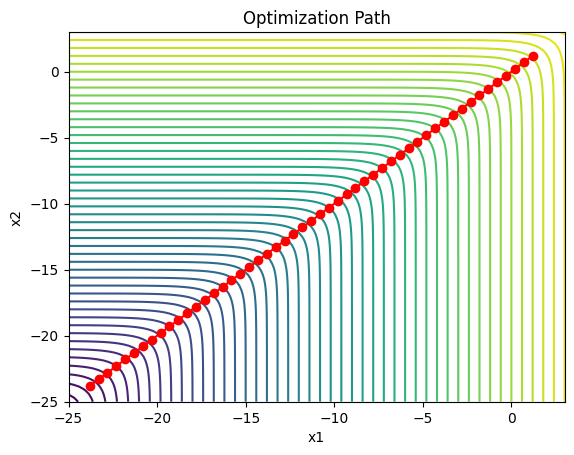

In [ ]:
def objective_function(x):
    return np.log(np.exp(x[0]) + np.exp(x[1]))

def grad_objective_function(x):
    return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
                     np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1]))])

def hessian_objective_function(x):
    return np.array([[np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])) -
                      (np.exp(x[0]) ** 2) / ((np.exp(x[0]) + np.exp(x[1])) ** 2),
                      -np.exp(x[0]) * np.exp(x[1]) / ((np.exp(x[0]) + np.exp(x[1])) ** 2)],
                     [-np.exp(x[0]) * np.exp(x[1]) / ((np.exp(x[0]) + np.exp(x[1])) ** 2),
                      np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1])) -
                      (np.exp(x[1]) ** 2) / ((np.exp(x[0]) + np.exp(x[1])) ** 2)]])

def plot_contour_path(path):
    x_vals = [point[0] for point in path]
    y_vals = [point[1] for point in path]
    plt.contour(X, Y, Z, levels=50)
    plt.plot(x_vals, y_vals, marker='o', color='r')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Optimization Path')
    plt.show()

# Initial values
x0 = np.array([1.2, 1.2])
alpha_bar = 1.0
rho = 0.8
c = 0.1
delta = 1

# Backtracking line search optimization
x = x0.copy()
path_backtracking = [x]
for _ in range(50):  # Limiting the number of iterations for illustration purposes
    grad = grad_objective_function(x)
    hessian = hessian_objective_function(x)
    p = dogleg_method(grad, hessian, delta)
    alpha = backtracking_line_search(objective_function, grad_objective_function, x, p, alpha_bar, rho, c)
    x = x + alpha * p
    path_backtracking.append(x)

# Plot the optimization path for backtracking line search
X, Y = np.meshgrid(np.linspace(-25, 3, 100), np.linspace(-25, 3, 100))
Z = np.log(np.exp(X) + np.exp(Y))
plot_contour_path(path_backtracking)


## Newton Algorithm with $ x_0 = (-1.2,1)^T$

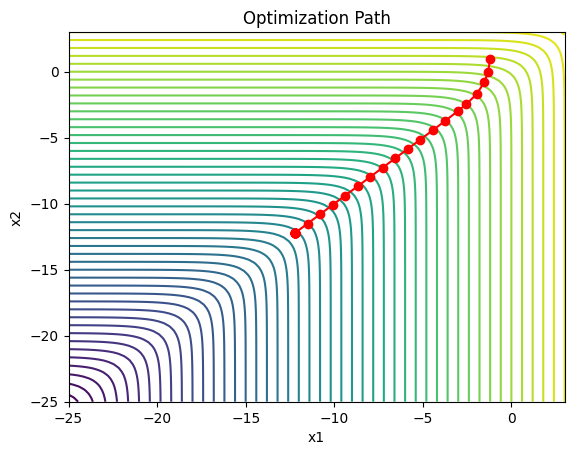

In [ ]:
import matplotlib.pyplot as plt
def objective_function(x):
    return np.log(np.exp(x[0]) + np.exp(x[1]))

def grad_objective_function(x):
    return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
                     np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1]))])

def hessian_objective_function(x):
    return np.array([[np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])) -
                      (np.exp(x[0]) ** 2) / ((np.exp(x[0]) + np.exp(x[1])) ** 2),
                      -np.exp(x[0]) * np.exp(x[1]) / ((np.exp(x[0]) + np.exp(x[1])) ** 2)],
                     [-np.exp(x[0]) * np.exp(x[1]) / ((np.exp(x[0]) + np.exp(x[1])) ** 2),
                      np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1])) -
                      (np.exp(x[1]) ** 2) / ((np.exp(x[0]) + np.exp(x[1])) ** 2)]])

def plot_contour_path(path):
    x_vals = [point[0] for point in path]
    y_vals = [point[1] for point in path]
    plt.contour(X, Y, Z, levels=50)
    plt.plot(x_vals, y_vals, marker='o', color='r')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Optimization Path')
    plt.show()

# Initial values
x0 = np.array([-1.2, 1])
alpha_bar = 1.0
rho = 0.8
c = 0.1
delta = 1

# Backtracking line search optimization
x = x0.copy()
path_backtracking = [x]
for _ in range(50):  # Limiting the number of iterations for illustration purposes
    grad = grad_objective_function(x)
    hessian = hessian_objective_function(x)
    p = dogleg_method(grad, hessian, delta)
    alpha = backtracking_line_search(objective_function, grad_objective_function, x, p, alpha_bar, rho, c)
    x = x + alpha * p
    path_backtracking.append(x)

# Plot the optimization path for backtracking line search
X, Y = np.meshgrid(np.linspace(-25, 3, 100), np.linspace(-25, 3, 100))
Z = np.log(np.exp(X) + np.exp(Y))
plot_contour_path(path_backtracking)


## BFGS Algorithm with $ x_0 = (1.2,1.2)^T $ , $ B=\frac{||g_0||}{\delta}I$

<ipython-input-10-05e5f87afb07>:15: RuntimeWarning: invalid value encountered in divide
  B_inv = (np.eye(len(x)) - np.outer(s, y) / np.dot(y, s)) @ B_inv @ (
<ipython-input-10-05e5f87afb07>:16: RuntimeWarning: invalid value encountered in divide
  np.eye(len(x)) - np.outer(y, s) / np.dot(y, s)
<ipython-input-10-05e5f87afb07>:17: RuntimeWarning: divide by zero encountered in divide
  ) + np.outer(s, s) / np.dot(y, s)


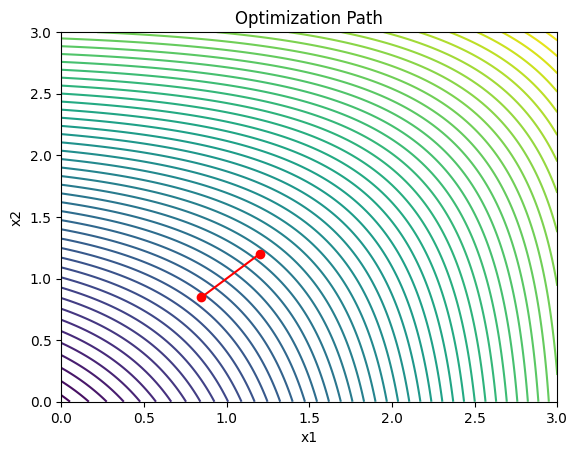

In [ ]:
import numpy as np

def bfgs_optimizer(f, grad_f, x0, alpha_bar, rho, c, delta, max_iter=100):
    x = x0.copy()
    B_inv = (np.linalg.norm(grad_f(x0)) / delta) * np.eye(len(x0))

    path_bfgs = [x]
    for _ in range(max_iter):
        grad = grad_f(x)
        p = -B_inv @ grad
        alpha = backtracking_line_search(f, grad_f, x, p, alpha_bar, rho, c)
        x_new = x + alpha * p
        s = x_new - x
        y = grad_f(x_new) - grad
        B_inv = (np.eye(len(x)) - np.outer(s, y) / np.dot(y, s)) @ B_inv @ (
            np.eye(len(x)) - np.outer(y, s) / np.dot(y, s)
        ) + np.outer(s, s) / np.dot(y, s)

        x = x_new
        path_bfgs.append(x)

    return path_bfgs

# Objective function and its derivatives
def objective_function(x):
    return np.log(np.exp(x[0]) + np.exp(x[1]))

def grad_objective_function(x):
    return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
                     np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1]))])
import matplotlib.pyplot as plt

def plot_contour_path(path):
    x_vals = [point[0] for point in path]
    y_vals = [point[1] for point in path]
    plt.contour(X, Y, Z, levels=50)
    plt.plot(x_vals, y_vals, marker='o', color='r')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Optimization Path')
    plt.show()


# Initial values
x0 = np.array([1.2, 1.2])
alpha_bar = 1.0
rho = 0.8
c = 0.1
delta = 1

# BFGS optimization
path_bfgs = bfgs_optimizer(objective_function, grad_objective_function, x0, alpha_bar, rho, c, delta)

# Plot the optimization path for BFGS
X, Y = np.meshgrid(np.linspace(-0, 3, 100), np.linspace(-00, 3, 100))
Z = np.log(np.exp(X) + np.exp(Y))
plot_contour_path(path_bfgs)


## BFGS Algorithm with $ x_0 = (-1.2,1)^T$ , $B=\frac{||g_0||}{\delta}I$

<ipython-input-15-2685eded6ef4>:26: RuntimeWarning: divide by zero encountered in log
  return np.log(np.exp(x[0]) + np.exp(x[1]))
<ipython-input-15-2685eded6ef4>:29: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
<ipython-input-15-2685eded6ef4>:30: RuntimeWarning: invalid value encountered in double_scalars
  np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1]))])
<ipython-input-15-2685eded6ef4>:47: RuntimeWarning: divide by zero encountered in log
  Z = np.log(np.exp(X) + np.exp(Y))


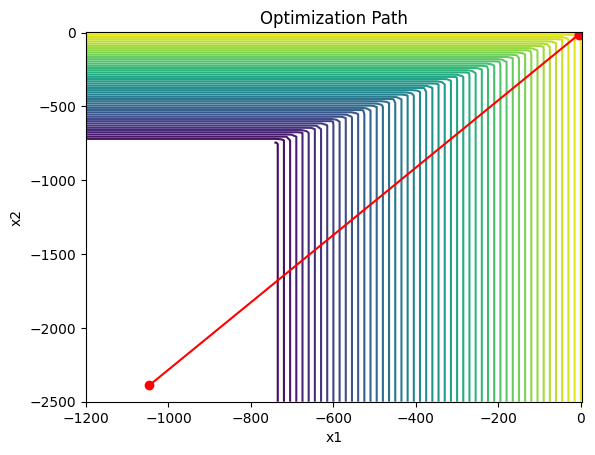

In [ ]:
import numpy as np

def bfgs_optimizer(f, grad_f, x0, alpha_bar, rho, c, delta, max_iter=100):
    x = x0.copy()
    B_inv = (np.linalg.norm(grad_f(x0)) / delta) * np.eye(len(x0))

    path_bfgs = [x]
    for _ in range(max_iter):
        grad = grad_f(x)
        p = -B_inv @ grad
        alpha = backtracking_line_search(f, grad_f, x, p, alpha_bar, rho, c)
        x_new = x + alpha * p
        s = x_new - x
        y = grad_f(x_new) - grad
        B_inv = (np.eye(len(x)) - np.outer(s, y) / np.dot(y, s)) @ B_inv @ (
            np.eye(len(x)) - np.outer(y, s) / np.dot(y, s)
        ) + np.outer(s, s) / np.dot(y, s)

        x = x_new
        path_bfgs.append(x)

    return path_bfgs

# Objective function and its derivatives
def objective_function(x):
    return np.log(np.exp(x[0]) + np.exp(x[1]))

def grad_objective_function(x):
    return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
                     np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1]))])
import matplotlib.pyplot as plt



# Initial values
x0 = np.array([-1.2, 1])
alpha_bar = 1.0
rho = 0.8
c = 0.1
delta = 1

# BFGS optimization
path_bfgs = bfgs_optimizer(objective_function, grad_objective_function, x0, alpha_bar, rho, c, delta)

# Plot the optimization path for BFGS
X, Y = np.meshgrid(np.linspace(-1200, 3, 100), np.linspace(-2500, 3, 100))
Z = np.log(np.exp(X) + np.exp(Y))
plot_contour_path(path_bfgs)


## BFGS Algorithm with $ x_0 = (1.2,1.2)^T$ , $B=\frac{y_1^Ty_1}{y_1^Ts_1}I$

<ipython-input-20-d9a859d87831>:11: OptimizeWarning: Unknown solver options: initial_hessian
  result = minimize(objective_function, x0, method='BFGS', jac=grad_objective_function,
<ipython-input-20-d9a859d87831>:27: RuntimeWarning: divide by zero encountered in log
  return np.log(np.exp(x[0]) + np.exp(x[1]))
<ipython-input-20-d9a859d87831>:35: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
<ipython-input-20-d9a859d87831>:36: RuntimeWarning: invalid value encountered in double_scalars
  np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1]))])
<ipython-input-20-d9a859d87831>:27: RuntimeWarning: divide by zero encountered in log
  return np.log(np.exp(x[0]) + np.exp(x[1]))
<ipython-input-20-d9a859d87831>:35: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
<ipython-input-20-d9a859d87831>:36: RuntimeWarning: invalid value encountered in double_sc

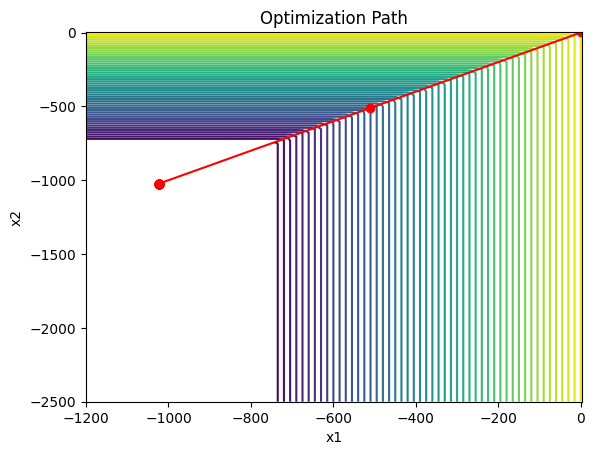

In [ ]:
import numpy as np
from scipy.optimize import minimize

# BFGS optimization with specified initial Hessian approximation
def bfgs_with_initial_hessian(x0, delta):
    path = [x0]
    B = np.eye(len(x0))  # Initialize Hessian approximation

    for _ in range(50):  # Limiting the number of iterations for illustration purposes
        grad = grad_objective_function(x0)
        result = minimize(objective_function, x0, method='BFGS', jac=grad_objective_function,
                          options={'disp': False, 'gtol': 1e-20, 'eps': delta, 'initial_hessian': B})
        x_next = result.x
        grad_next = grad_objective_function(x_next)

        y = grad_next - grad
        s = x_next - x0

        B = B + np.outer(y, y) / np.dot(y, s) - (B @ np.outer(s, s) @ B) / np.dot(s, B @ s)

        x0 = x_next
        path.append(x0)

    return path

def objective_function(x):
    return np.log(np.exp(x[0]) + np.exp(x[1]))

# Initial values
x0 = np.array([1.2, 1.2])
delta = 1

# Define the gradient of the objective function
def grad_objective_function(x):
    return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
                     np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1]))])


# Run BFGS with specified initial Hessian
path_bfgs_with_initial_hessian = bfgs_with_initial_hessian(x0, delta)

# Plot the optimization path for BFGS with specified initial Hessian
plot_contour_path(path_bfgs_with_initial_hessian)


## BFGS Algorithm with $ x_0 = (-1.2,1)^T$ , $B=\frac{y_1^Ty_1}{y_1^Ts_1}I$

<ipython-input-22-16e3b374708b>:11: OptimizeWarning: Unknown solver options: initial_hessian
  result = minimize(objective_function, x0, method='BFGS', jac=grad_objective_function,
<ipython-input-22-16e3b374708b>:27: RuntimeWarning: divide by zero encountered in log
  return np.log(np.exp(x[0]) + np.exp(x[1]))
<ipython-input-22-16e3b374708b>:35: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
<ipython-input-22-16e3b374708b>:36: RuntimeWarning: invalid value encountered in double_scalars
  np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1]))])
<ipython-input-22-16e3b374708b>:27: RuntimeWarning: divide by zero encountered in log
  return np.log(np.exp(x[0]) + np.exp(x[1]))
<ipython-input-22-16e3b374708b>:35: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
<ipython-input-22-16e3b374708b>:36: RuntimeWarning: invalid value encountered in double_sc

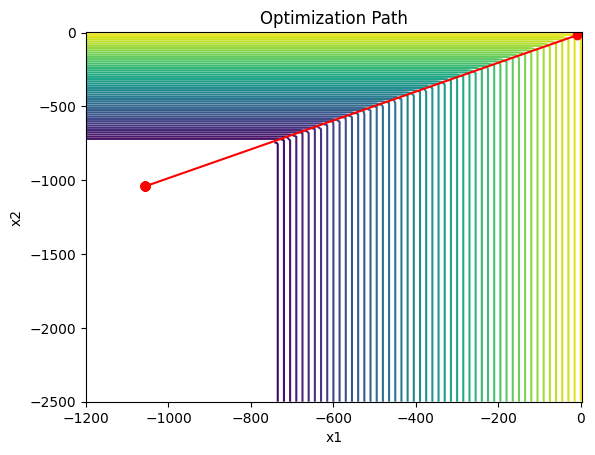

In [ ]:
import numpy as np
from scipy.optimize import minimize

# BFGS optimization with specified initial Hessian approximation
def bfgs_with_initial_hessian(x0, delta):
    path = [x0]
    B = np.eye(len(x0))  # Initialize Hessian approximation

    for _ in range(50):  # Limiting the number of iterations for illustration purposes
        grad = grad_objective_function(x0)
        result = minimize(objective_function, x0, method='BFGS', jac=grad_objective_function,
                          options={'disp': False, 'gtol': 1e-5, 'eps': delta, 'initial_hessian': B})
        x_next = result.x
        grad_next = grad_objective_function(x_next)

        y = grad_next - grad
        s = x_next - x0

        B = B + np.outer(y, y) / np.dot(y, s) - (B @ np.outer(s, s) @ B) / np.dot(s, B @ s)

        x0 = x_next
        path.append(x0)

    return path

def objective_function(x):
    return np.log(np.exp(x[0]) + np.exp(x[1]))

# Initial values
x0 = np.array([-1.2, 1])
delta = 1

# Define the gradient of the objective function
def grad_objective_function(x):
    return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
                     np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1]))])


# Run BFGS with specified initial Hessian
path_bfgs_with_initial_hessian = bfgs_with_initial_hessian(x0, delta)

# Plot the optimization path for BFGS with specified initial Hessian
plot_contour_path(path_bfgs_with_initial_hessian)
